In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
data = pd.read_csv('C:\\Users\\Narthana\\Desktop\\sales.csv') 

# Display the first few rows of the dataset to understand its structure
print(data.head())


   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0  30-12-2019 00:01  136 Church St, New York City, NY 10001     12  1700.00   
1  29-12-2019 07:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12-12-2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22-12-2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18-12-2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0 

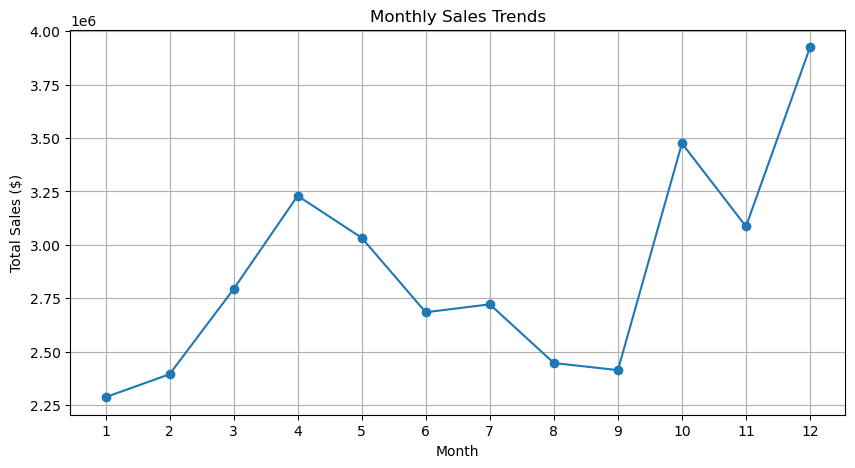

In [3]:
# Convert the 'Order Date' column to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Extract the month and hour from the 'Order Date' column
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour

# Group the data by month and calculate total sales for each month
monthly_sales = data.groupby('Month')['Sales'].sum()

# Plot the sales trends over the months
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()


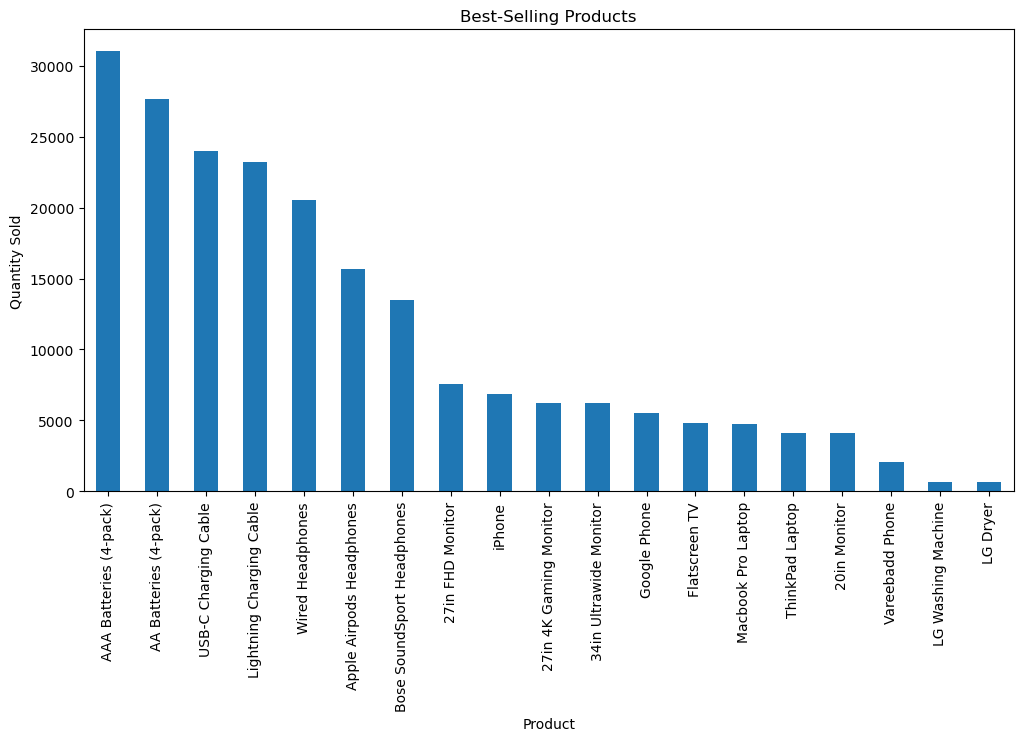

In [4]:
# Group the data by product and calculate the total quantity sold for each product
best_selling_products = data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plot the best-selling products
plt.figure(figsize=(12, 6))
best_selling_products.plot(kind='bar')
plt.title('Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.show()


In [5]:
# Calculate total sales and profit margin
total_sales = data['Sales'].sum()
total_profit = total_sales - (data['Quantity Ordered'] * data['Price Each']).sum()

# Display the results
print(f"Total Sales: ${total_sales:.2f}")
print(f"Total Profit: ${total_profit:.2f}")


Total Sales: $34492035.97
Total Profit: $0.00


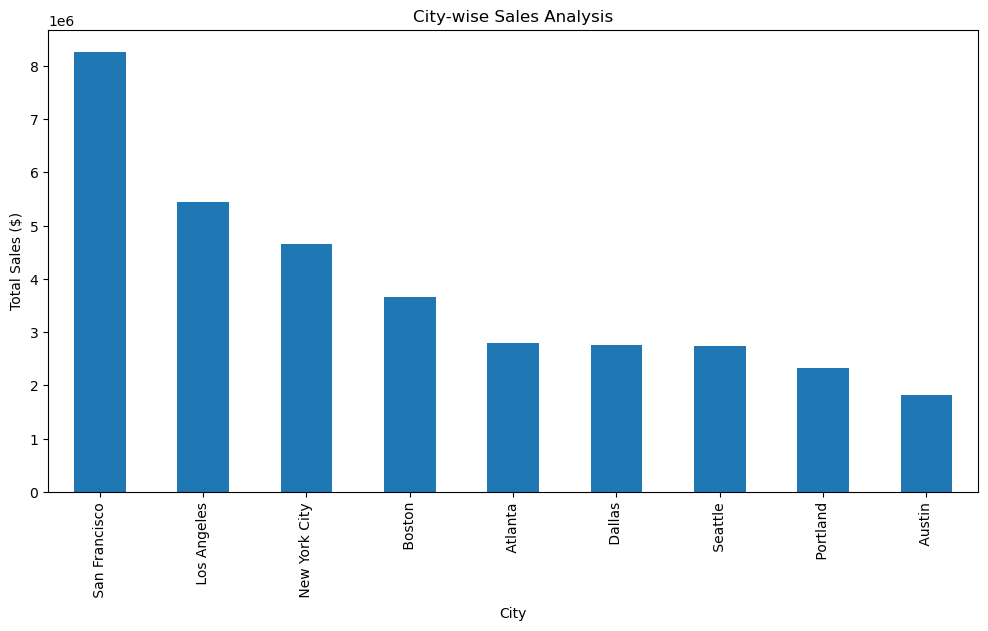

In [6]:
# Extract the city from the 'Purchase Address' column
data['City'] = data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Group the data by city and calculate total sales for each city
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot city-wise sales
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar')
plt.title('City-wise Sales Analysis')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.show()


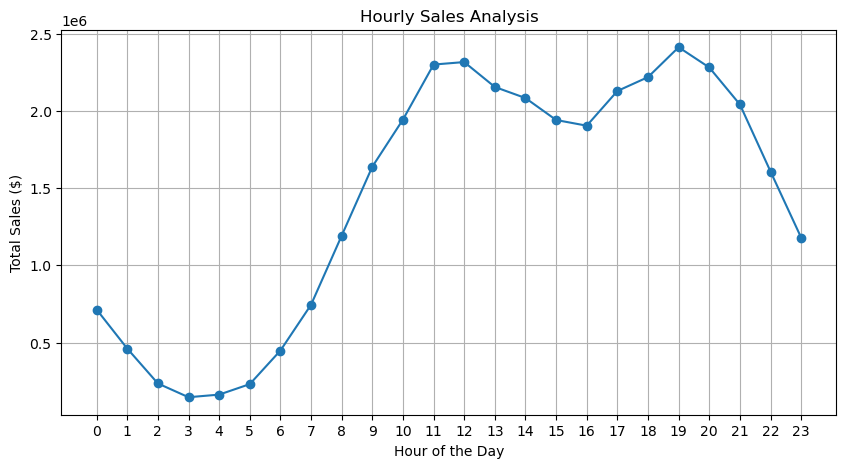

In [7]:
# Group the data by hour and calculate total sales for each hour
hourly_sales = data.groupby('Hour')['Sales'].sum()

# Plot hourly sales
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='line', marker='o')
plt.title('Hourly Sales Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales ($)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


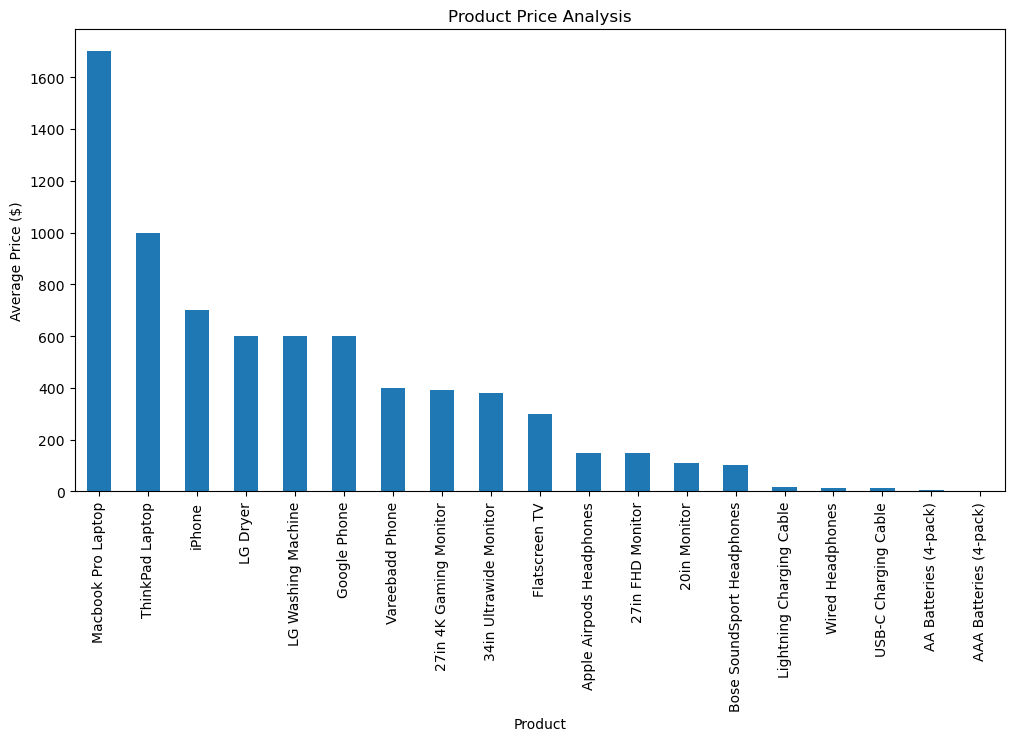

In [8]:
# Group the data by product and calculate the average price for each product
average_price = data.groupby('Product')['Price Each'].mean().sort_values(ascending=False)

# Plot average prices for products
plt.figure(figsize=(12, 6))
average_price.plot(kind='bar')
plt.title('Product Price Analysis')
plt.xlabel('Product')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()
